This code computes the approximate integral of a function involving a **Dirac Delta-like approximation** (Gaussian approximation) and evaluates its properties at different values of \( x \). Here's an explanation of the logic and steps:

---

### **Key Components**

#### **1. Function Approximation for the Dirac Delta**
```python
def ddf(x, sigma):
    return (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-((x - 2) ** 2) / (2 * sigma**2))
```
- **Gaussian Approximation**:
  - The function approximates the Dirac Delta function using a Gaussian distribution centered at \( x = 2 \) with a standard deviation \( \sigma \).
  - **Key Properties**:
    - Narrower Gaussian as \( \sigma \to 0 \).
    - Total integral over the real line equals 1.

---

#### **2. Integration Setup**
```python
xv = [1, 0.1, 0.01]
sigma = 0.1
```
- **Evaluation Points**: The values of \( x \) where the integral is computed.
- **Standard Deviation (\( \sigma \))**: Controls the spread of the Gaussian.

---

#### **3. Computing the Integral**
```python
for x in xv:
    ddfv = ddf(np.linspace(x - 1, x + 1, 10000), sigma)
    i = ddfv * (np.linspace(x - 1, x + 1, 10000) + 3)
    integral = np.trapz(i, x=np.linspace(x - 1, x + 1, 10000))
    I.append(integral)
```
- **Integration Region**:
  - For each \( x \), the function integrates over the range \( [x - 1, x + 1] \) using a fine grid with 10,000 points.
  - Ensures accurate numerical integration even for a narrow Gaussian.
- **Integrand**:
  - \( ddf(x) \times (x + 3) \), as defined in the problem.
- **Integration Method**:
  - Uses `np.trapz` (trapezoidal rule) for numerical integration.

---

#### **4. Results**
```python
print(f"Results for x = 1, 0.1, 0.01: {I}")
```
- **Outputs the integral results for each value of \( x \).**
- These values highlight how the Dirac Delta function selectively "samples" the input function at specific locations.

---

#### **5. Plotting**
```python
xp = np.linspace(0, 4, 10000)
yp = ddf(xp, sigma)

plt.figure(figsize=(8, 6))
plt.plot(xp, yp, label='Dirac Delta Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Dirac Delta Function and its Integral')
plt.legend()
plt.show()
```
- **Visualizing the Gaussian Approximation**:
  - Plots the Gaussian approximation of the Dirac Delta function.
  - Provides an intuitive understanding of how the function is localized around \( x = 2 \).

---

### **Expected Results**
- For a Dirac Delta-like function, the integral \( \int f(x) \delta(x - 2) \, dx \approx f(2) \).
- As \( \sigma \to 0 \), the result should converge to \( (2 + 3) = 5 \).

---

### **Applications**
This approach is commonly used in:
- **Signal Processing**: For understanding impulse responses.
- **Physics**: Modeling point charges or forces.
- **Mathematics**: Approximation and properties of distributions.

Results for x = 1, 0.1, 0.01: [2.4601057852605956, 4.61509148117378e-19, 8.32597542658646e-23]


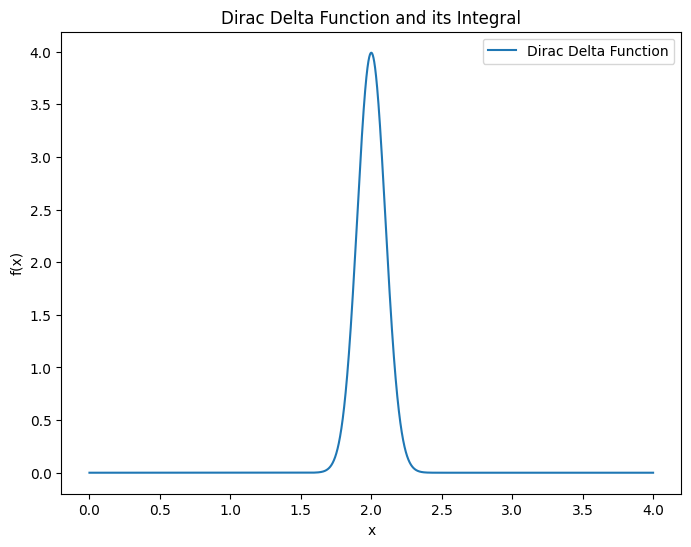

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def ddf(x, sigma):
    return (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-((x - 2) ** 2) / (2 * sigma**2))

# Set the values of x to evaluate the function at
xv = [1, 0.1, 0.01]
sigma = 0.1

# Calculate the integral of the Dirac Delta function for each value of x
I = []
for x in xv:
    ddfv = ddf(np.linspace(x - 1, x + 1, 10000), sigma)

    # Compute the integrand: ddf * (x + 3)
    i = ddfv * (np.linspace(x - 1, x + 1, 10000) + 3)

    # Integrate using np.trapz
    integral = np.trapz(i, x=np.linspace(x - 1, x + 1, 10000))
    I.append(integral)

# Print the results
print(f"Results for x = 1, 0.1, 0.01: {I}")

# Create a plot to visualize the Dirac Delta function and its integral
xp = np.linspace(0, 4, 10000)
yp = ddf(xp, sigma)

plt.figure(figsize=(8, 6))
plt.plot(xp, yp, label='Dirac Delta Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Dirac Delta Function and its Integral')
plt.legend()
plt.show()